# Observed Taylor law: variance vs mean 
**in protein length distributions for the different reference proteomes**

## Import python modules

In [1]:
import numpy as np
#import matplotlib.pyplot as plt
from scipy import stats
#import os 
import pandas as pd
#import math
#
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

## Retrieving the statistical descriptions of the protein length's distributions for the different proteomes

In [2]:
# statistics on length distribution for different species
working_on_extra_path = "../../main_work/"
stat_file = working_on_extra_path + "../main_tables/stat_proteins.tsv"
print("The statistical descriptions of the protein distributions for the different proteomes is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["species", "superregnum", "tax_id", "proteome_id", "count", "mean", "var"]] 

# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)

The statistical descriptions of the protein distributions for the different proteomes is in:
 ../../main_work/../main_tables/stat_proteins.tsv 



,species,superregnum,tax_id,proteome_id,count,mean,var
0,Kurthia sp. 3B1D,bacteria,1562256,UP000288623,3621.0,285.936205,36171.895653
1,Methyloprofundus sedimenti,bacteria,1420851,UP000191980,3608.0,310.654933,52309.438700


(9913, 7)


## Python functions

In [3]:
# species' stats for length distribution
def get_df_for_taxid(df, taxid):
     return df.loc[df["tax_id"]==taxid].copy()

In [4]:
def plot_taylor (df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression): 
    #Calculate best fit line
    slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df2plot[col_x]),np.log10(df2plot[col_y]))
    #Format the regression text
    if 0: 
        print("v = {:4.4} * m^{:4.4};   R^2= {:2.4f}".format(10**intercept, slope, r_value**2))
    if bool_show_regression:
        txt = '$\sigma^{2} = ' + '{:4.2} '.format(10**intercept)  + ' \t ' + '\mu^{' + '{:4.3}'.format(slope) + '}' + ';\tR^{2} = ' + '{:2.2f}$'.format(r_value**2)
    else:
        txt = ''
        
    p = (   
        ggplot(df2plot, aes(col_x, col_y, color=legends_by)) + geom_point(size=0.1) +
        geom_smooth(method="lm", color="green", size=0.25, span=.8)+
        labs(title=title, x=x_lab, y=y_lab) 
        + scale_color_manual(values=['#D83B01', '#002050', '#A80000', '#FFA500', '#107C10','#EF008C', '#0078D7', '#B4009E']) # + scale_color_brewer() '#5C2D91'
        + labs(color='Clade') # legend title
        + scale_x_log10(breaks=[10 ** power for power in range(6)],
          limits=[min(df2plot[col_x].to_list())/2, 2*max(df2plot[col_x].to_list())]) 
        + scale_y_log10(breaks = [10**power for power in range(13)], 
          limits = [min(df2plot[col_y].to_list())/2,2*max(df2plot[col_y].to_list())])#, labels=scientific_format(digits=2)
    ) + theme(legend_position=(0.75,0.25), legend_key_size=5, legend_background=element_rect(fill='grey', alpha=0.01)) + annotate('text', x=0.2*max(df2plot[col_x].to_list()), y=0.95*max(df2plot[col_y].to_list()), label=txt,size=9,color="black")
    print(p)

## Observations: variance vs. mean (represented in $log_{10}$ scale)
## Protein coding gene length distributions  
$\sigma^{2}$ is the variance   
$\mu$ is the mean  

### All reference proteomes from the paper (9,913)

(9913, 7)
superregnum
bacteria     7997
eukaryota    1586
archaea       330
Name: count, dtype: int64


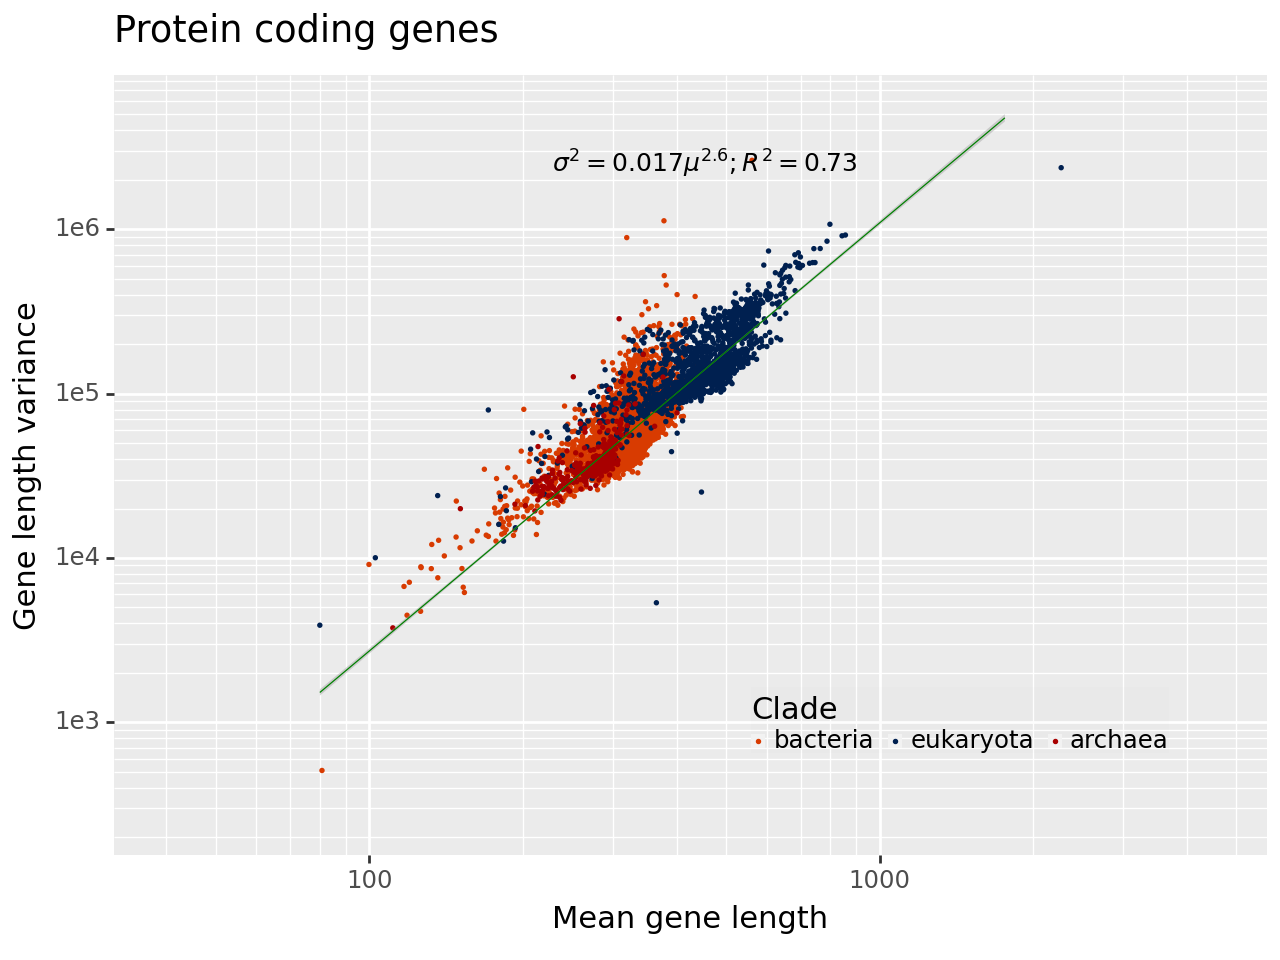

In [5]:
col_x = "mean"  # prots_mean
col_y = "var"   # prots_var
legends_by = "superregnum"

title = "Protein coding genes" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean gene length"   
y_lab = "Gene length variance"
bool_show_regression = True

df2plot = stat_df.copy()
if 1:
    print(df2plot.shape)
    print(df2plot['superregnum'].value_counts(dropna=False))
# Sort division in order to plot the clades in an order (everything can be displayed)
if 0:
    print(df2plot.superregnum.unique())
df2plot.superregnum = pd.Categorical(df2plot.superregnum, 
                                categories=['bacteria', 'eukaryota', 'archaea'],
                                ordered=True)
df2plot.sort_values('superregnum', inplace=True)

plot_taylor(df2plot, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

#### Note:  
$\sigma^{2} = a . \mu^{\beta}$   
Because the regression line is:  
$\log(\sigma^{2}) = \log(a) + \beta log(\mu) $

### Protein coding genes (merged with proteins set)
6519 entradas 

#### Retrieving the statistical descriptions of the gene length's distributions for the diff. species

In [6]:
# statistics on length distribution for different species
working_on_extra_path = "../../main_work/"
stat_file = working_on_extra_path + "../main_tables/stat_merged.tsv"
print("The statistical descriptions of the protein coding gene distributions for the different species, of the merged set with Uniprot reference proteomes, is in:\n", stat_file, "\n")

# retrieve data and diminish the number of columns
stat_df = pd.read_csv(stat_file, low_memory=False, sep="\t")
stat_df = stat_df[["merged_division_superregnum", "genes_species", "tax_id", "prots_count", "prots_mean", "prots_var"]]
stat_df = stat_df.rename(columns={'merged_division_superregnum': 'division', 'genes_species': 'species', # division for simplifying
                         'tax_id': 'taxonomy_id'})                                                       # species, taxonomy_id for the gene quality sake
                                                                                                       
# visualize data
pd.set_option('display.max_columns', None)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)

The statistical descriptions of the protein coding gene distributions for the different species, of the merged set with Uniprot reference proteomes, is in:
 ../../main_work/../main_tables/stat_merged.tsv 



,division,species,taxonomy_id,prots_count,prots_mean,prots_var
0,bacteria,archangium_gephyra_gca_001027285,48,10110.0,367.499703,141204.779058
1,bacteria,chondromyces_crocatus_gca_001189295,52,8327.0,403.466555,122906.027917


(6519, 6)


#### Plot the taylor

(6519, 6)
division
bacteria       5468
fungi           533
archaea         227
vertebrates      92
protist          91
plants           59
metazoa          49
Name: count, dtype: int64


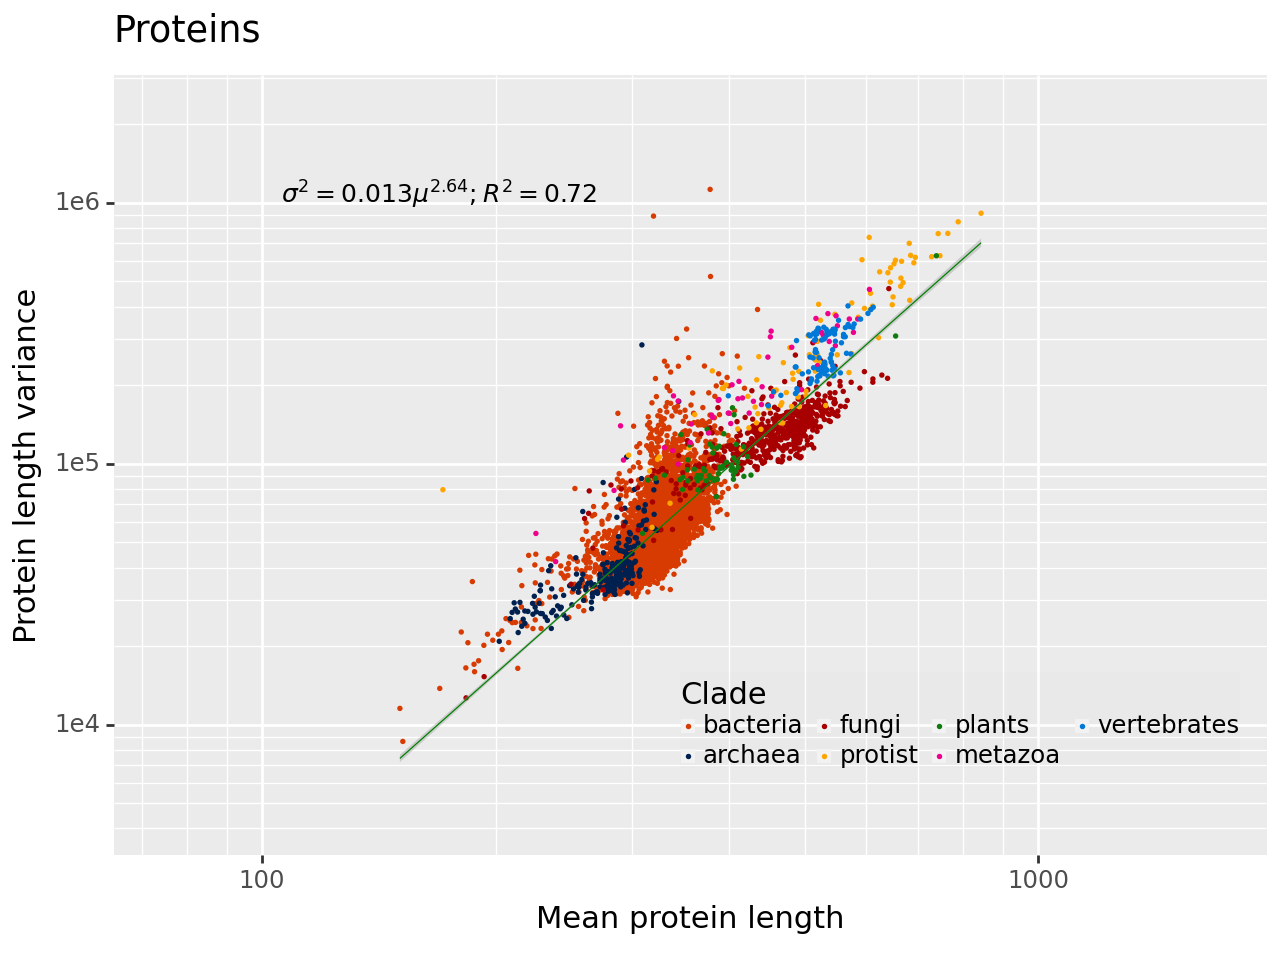

In [7]:
df2plot2 = stat_df.copy()

if 1:
    print(df2plot2.shape)
    print(df2plot2['division'].value_counts(dropna=False))
    
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
# perhaps transparency to protist will solve the visualization problem
if 0:
    print(df2plot2.merged_division_superregnum.unique())
df2plot2.division = pd.Categorical(df2plot2.division, 
                                categories=['bacteria', 'archaea', 'fungi', 'protist', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot2.sort_values('division', inplace=True)

# Prepare to plot
col_x = "prots_mean"  # prots_mean
col_y = "prots_var"   # prots_var
legends_by = "division"

title = "Proteins" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean protein length"   
y_lab = "Protein length variance"
bool_show_regression = True
plot_taylor(df2plot2, col_x, col_y, x_lab, y_lab, title, bool_show_regression)

## Filtro por calidad de Genomas: usando NCBI genome annotations

#### Get good genomes
Genome status: Complete Genome or Chromosomes (from NCBI genome annotation)

In [8]:
from pathlib import Path
home = str(Path.home())
print(home)

/home/emuro


In [9]:
# Prokarya genomes: get those with a good genome annotation ("Status")
#
ncbi_genome_home = home + "/Desktop/goingOn/geneLength/NCBI_genomeReports/"
col1 = "TaxID"
col2 = "Assembly Accession"
if 1:
    good_status = ["Complete Genome", "Chromosome"]
else:
    good_status = ["Complete Genome"] 

# Get well annotated eukarya genomes
g_prok_df = pd.read_csv(ncbi_genome_home + "prokaryotes_EMcolFiltered.txt", low_memory=False, sep="\t") # tax_id, status, accession 
g_euk_df  = pd.read_csv(ncbi_genome_home + "eukaryotes_EMcolFiltered.txt", sep="\t")                    
print("prokaryotes", g_prok_df.shape) # display(g_prok_df)
print("eukaryotes",  g_euk_df.shape)

# Ya filtra la calidad!
if 1: # 0: no filtra por calidad
    g_prok_df = g_prok_df[ g_prok_df["Status"].isin(good_status)]
    g_euk_df  = g_euk_df[  g_euk_df["Status"].isin(good_status)]
print("prokaryotes", g_prok_df.shape)
print("eukaryotes", g_euk_df.shape)

prokaryotes (405092, 6)
eukaryotes (22897, 6)
prokaryotes (34348, 6)
eukaryotes (3437, 6)


### From NCBI Assemblies files 
- dict: GC\% of Assembly_accession of species
- dict: size (Mbp) of Assembly_accession
- dict: replicons of Assembly_accession
- dict: status of Assembly_accession

In [10]:
print("Only high quality genomes!")

#
# Eukaryotes
if 0:
    print(g_euk_df.columns)
dict_euk_taxidOfAssembly     = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["TaxID"]))          # print(dict_euk_taxidOfAssembly)
dict_euk_gcOfAssembly        = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["GC%"]))            
dict_euk_sizeOfAssembly      = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["Size (Mb)"]))      
dict_euk_repliconsOfAssembly = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["Replicons"]))     
dict_euk_statusOfAssembly    = dict(zip(g_euk_df["Assembly Accession"], g_euk_df["Status"]))         
if 1:
  print(len(dict_euk_statusOfAssembly), "Eukaryotes")

# Prokaryotes
if 0:
    print(g_prok_df.columns)
dict_taxidOfAssembly     = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["TaxID"]))            # print(dict_taxidOfAssembly)
dict_gcOfAssembly        = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["GC%"]))            
dict_sizeOfAssembly      = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["Size (Mb)"]))       
dict_repliconsOfAssembly = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["Replicons"]))     
dict_statusOfAssembly    = dict(zip(g_prok_df["Assembly Accession"], g_prok_df["Status"]))        
if 1:
  print(len(dict_sizeOfAssembly), "Prokaryotes")

# Final dictionaries for Eukaryotes and Prokaryotes
dict_taxidOfAssembly.update(    dict_euk_taxidOfAssembly)
dict_gcOfAssembly.update(       dict_euk_gcOfAssembly)
dict_sizeOfAssembly.update(     dict_euk_sizeOfAssembly)
dict_repliconsOfAssembly.update(dict_euk_repliconsOfAssembly)
dict_statusOfAssembly.update(   dict_euk_statusOfAssembly)
if 1:
  print(len(dict_sizeOfAssembly), "Eukaryotes & Prokaryotes")

Only high quality genomes!
3437 Eukaryotes
34348 Prokaryotes
37785 Eukaryotes & Prokaryotes


#### Taxid/assemblies for high quality genome assemblies

In [11]:
taxid_highqu_genome_l = list(dict_taxidOfAssembly.values())
assembly_highqu_genome_l = list(dict_taxidOfAssembly.keys())

### From Ensembl Tax_id file 
dict: Assembly_accession of species (species is a perfect id in this case)

In [12]:
# ENSEMBL tax_id
# system
import os
system = list(os.uname())[0]
if system == 'Linux':
    base_dir = "/media/emuro/Nubya/"
elif system == 'Darwin':
    base_dir = "/Volumes/Nubya/"
ensembl_taxId_file = base_dir + "results/geneLength/outputInputFiles/" + "some_tables/species_Ensembl_taxid/" + "species_Ensembl_EMv2.0.tsv" # with covid
print(ensembl_taxId_file)

# retrieve data
taxid_df = pd.read_csv(ensembl_taxId_file, sep="\t")
taxid_df = taxid_df[["species", "assembly_accession"]]

dict_assemblyOfSpecies = dict(zip(taxid_df["species"], taxid_df["assembly_accession"])) # print(len(dict_assemblyOfSpecies))
# visualize data
if 0:
    print(dict_assemblyOfspecies)
pd.set_option('display.max_columns', None)
if 0:
    display(taxid_df.head(2))
    print(taxid_df.shape)

# Add the assembly of the species
stat_df["ensembl_assembly"] = stat_df["species"].map(dict_assemblyOfSpecies)
if 1:
    display(stat_df.head(2))
    print(stat_df.shape)       

/media/emuro/Nubya/results/geneLength/outputInputFiles/some_tables/species_Ensembl_taxid/species_Ensembl_EMv2.0.tsv


,division,species,taxonomy_id,prots_count,prots_mean,prots_var,ensembl_assembly
0,bacteria,archangium_gephyra_gca_001027285,48,10110.0,367.499703,141204.779058,GCA_001027285.1
1,bacteria,chondromyces_crocatus_gca_001189295,52,8327.0,403.466555,122906.027917,GCA_001189295.1


(6519, 7)


#### Taxid with high quality genome assemblies

In [13]:
# taxid with high quality genome assemblies
taxid_highqu_genome_l    = list(dict_taxidOfAssembly.values()) # taxids
assembly_highqu_genome_l = list(dict_taxidOfAssembly.keys())   # assemblies

stat_df = stat_df[stat_df["taxonomy_id"].isin(taxid_highqu_genome_l)] # reduce to hquality taxonomies...
print(stat_df.shape)
#
stat_df = stat_df[stat_df["ensembl_assembly"].isin( assembly_highqu_genome_l )]
print(stat_df.shape)

(1948, 7)
(1622, 7)


#### For each filtered species add: genome size, gc content, chromosomes,... 

In [14]:
# Add the assembly of the species
stat_df["ensembl_assembly"] = stat_df["species"].map(dict_assemblyOfSpecies)
# Add more genomic info
stat_df["gc_percent"]      = stat_df["ensembl_assembly"].map(dict_gcOfAssembly)
stat_df["size_Mbp"]        = stat_df["ensembl_assembly"].map(dict_sizeOfAssembly)
stat_df["assembly_status"] = stat_df["ensembl_assembly"].map(dict_statusOfAssembly)
stat_df["chromosomes"]     = stat_df["ensembl_assembly"].map(dict_repliconsOfAssembly)

display(stat_df.head(2))
print(stat_df.shape)
print(stat_df['division'].value_counts(dropna=False))

,division,species,taxonomy_id,prots_count,prots_mean,prots_var,ensembl_assembly,gc_percent,size_Mbp,assembly_status,chromosomes
0,bacteria,archangium_gephyra_gca_001027285,48,10110.0,367.499703,141204.779058,GCA_001027285.1,69.4,12.4894,Complete Genome,chromosome:NZ_CP011509.1/CP011509.1
1,bacteria,chondromyces_crocatus_gca_001189295,52,8327.0,403.466555,122906.027917,GCA_001189295.1,68.7,11.3881,Complete Genome,chromosome:NZ_CP012159.1/CP012159.1


(1622, 11)
division
bacteria       1416
archaea          99
fungi            33
plants           30
vertebrates      29
metazoa           8
protist           7
Name: count, dtype: int64


#### Plot the taylor

(1622, 11)
division
bacteria       1416
archaea          99
fungi            33
plants           30
vertebrates      29
metazoa           8
protist           7
Name: count, dtype: int64


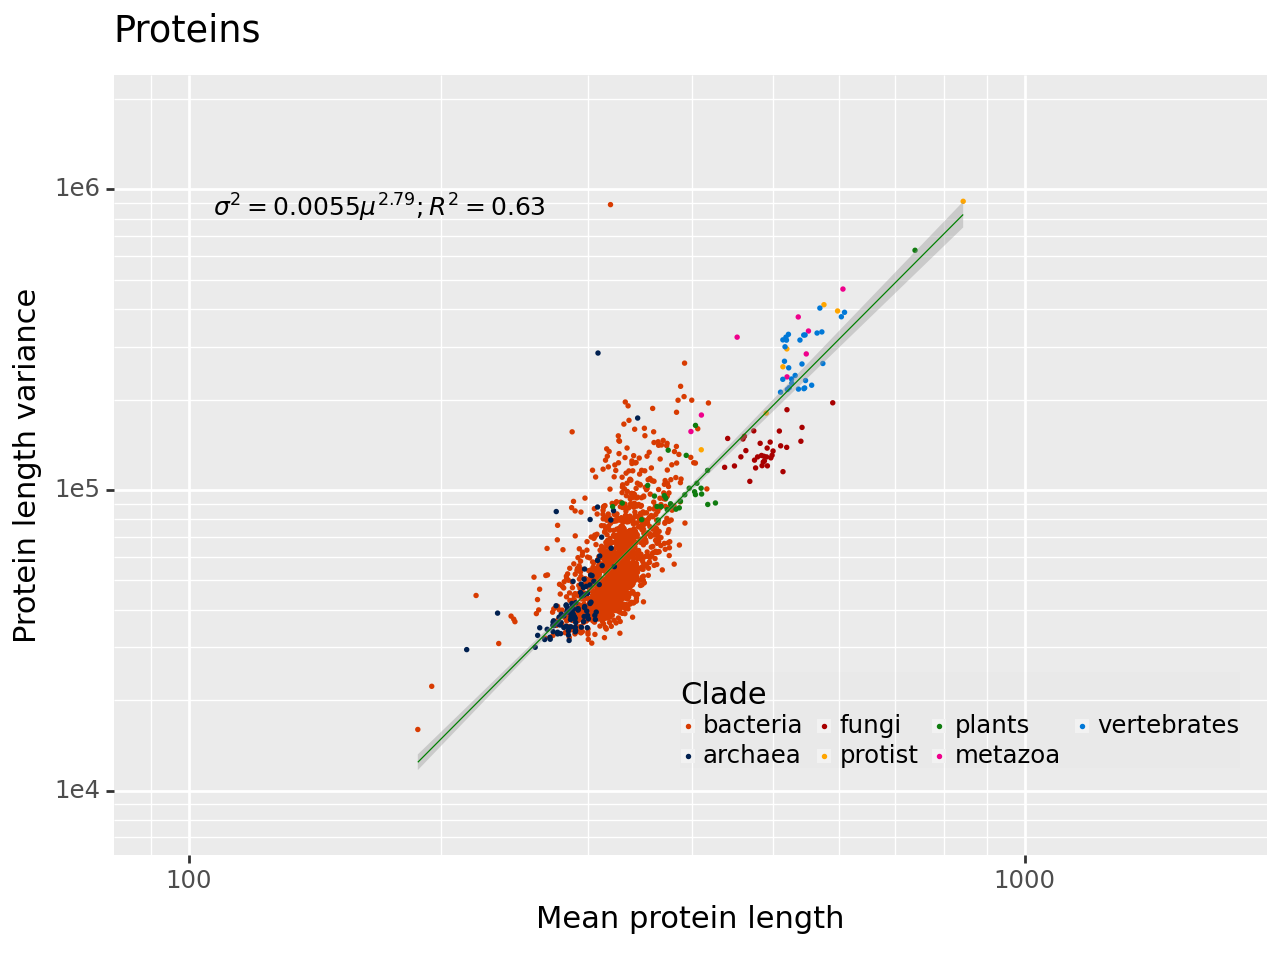

In [15]:
df2plot2 = stat_df.copy()

if 1:
    print(df2plot2.shape)
    print(df2plot2['division'].value_counts(dropna=False))
    
# Sort division_8 in order to plot the clades in an order (everything can be displayed)
# perhaps transparency to protist will solve the visualization problem
if 0:
    print(df2plot2.merged_division_superregnum.unique())
df2plot2.division = pd.Categorical(df2plot2.division, 
                                categories=['bacteria', 'archaea', 'fungi', 'protist', 'plants', 'metazoa', 'vertebrates'],
                                ordered=True)
df2plot2.sort_values('division', inplace=True)

# Prepare to plot
col_x = "prots_mean"  # prots_mean
col_y = "prots_var"   # prots_var
legends_by = "division"

title = "Proteins" # "Uniprot, reference Proteomes (protein length)"
x_lab = "Mean protein length"   
y_lab = "Protein length variance"
bool_show_regression = True
plot_taylor(df2plot2, col_x, col_y, x_lab, y_lab, title, bool_show_regression)